In [1]:
using Random
using TensorCrossInterpolation
import TensorCrossInterpolation as TCI
using CSV
using DataFrames
using Statistics
using LinearAlgebra
using LaTeXStrings
using Plots
using JLD2
using Tensor_FixedSeedMC
import Tensor_FixedSeedMC as TCIMC

# Preparation

In [2]:
#JLD2.@load "../tt_data/volatility_d5_1525_100_rand_ver2_.jld2" Ms
#JLD2.@load "vol_d5_random_gauss.jld2" Ms
JLD2.@load "vol_1e-3,15,rand.jld2" tt_tci
M = tt_tci.sitetensors


10-element Vector{Array{Float64, 3}}:
 [0.0 0.019544672997764856 … 0.9958100028413055 1.0;;; 1.0 0.9806319070527983 … 0.0042417886296842785 0.0]
 [-0.01431986279395845 -0.007441272903391609 … 0.9905885952984181 1.0; 0.0 -0.002772171298539794 … -0.0008238837883360814 0.0;;; 0.02684362939163138 0.012885459881292497 … -0.004826636331639305 0.0; 1.0 0.9805170311898304 … 0.004916003597712382 0.0;;; -0.011941287832975878 -0.005582440090303009 … 0.002211134431110088 0.0; 0.0 0.016251237854038657 … 0.9937877403927432 1.0;;; 0.9987365045856857 0.9997987190909424 … 0.012170475806034016 0.0; 0.0 0.006365342156111998 … 0.002289799267784291 0.0]
 [0.0 0.016536605004747896 … 0.9971887683613443 1.0; 0.0 -0.00017093560090508664 … -0.19930751468696006 -0.2015295101047831; -0.14291331608402147 -0.1378137447635407 … 0.0012377882250360385 0.0; 0.07375010412091265 0.07791858364555015 … 0.0029023565575589712 0.0;;; 0.0 0.00314937129075632 … 0.004516523571082386 0.0; 1.0 0.9950282197799439 … 0.44121710244321

In [3]:
@show TCIMC.bonddims(M)

TCIMC.bonddims(M) = [1, 2, 4, 5, 3, 1, 1, 1, 1, 1, 1]


11-element Vector{Int64}:
 1
 2
 4
 5
 3
 1
 1
 1
 1
 1
 1

In [4]:
tol = 1e-3
TCIMC.compress!(M; tolerance=tol)

In [5]:
@show TCIMC.bonddims(M)

TCIMC.bonddims(M) = [1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1]


11-element Vector{Int64}:
 1
 2
 2
 3
 2
 1
 1
 1
 1
 1
 1

## evaluate_option

In [6]:
d = 5
T = 1.0
r = 0.01
K = 100.0
t = 0.0
η = 0.4  # d=5

σs = collect(0.15:0.001:0.249)
len_σs = length(σs)

100

In [7]:
function evaluate_options(random_combinations, tt_option,  d, r, T, t)
    result_hako = []
    result_time = []
    for i in random_combinations
        #@show i
        time_inner = @elapsed begin
            inner_ = TCIMC._evaluate(tt_option, i)
            #result = (exp(-r * (T - t)) * inner_) / ((2 * π)^d * normalization)
            result = real(inner_)
        end
        push!(result_hako, result)
        push!(result_time, time_inner)
    end
    return result_hako, result_time
end

evaluate_options (generic function with 1 method)

In [8]:
option_tt = M

10-element Vector{Array{Float64, 3}}:
 [1.2590448798025198e9 1.2604091082390904e9 … 1.3172907306884344e9 1.3174703253529189e9;;; -8.450146803397467e6 -8.1889879317782745e6 … 4.931603733983751e6 4.988348637230137e6]
 [0.0940794786657375 0.09425718113768318 … 0.10370491905343114 0.10375096708376474; -0.0576784076892412 -0.056140619863036895 … 0.03990438080992755 0.040470244667169496;;; 0.0007716482683985485 0.0007527733063683005 … -0.000574587451501136 -0.0005836218349658669; -0.06598136015737473 -0.06668084731814569 … -0.11696629908809858 -0.1173083823001514]
 [-0.09479386978143305 -0.09495838398092477 … -0.1030684083864241 -0.10310352838973923; -0.11714041000507384 -0.11407557570975266 … 0.08152124669982104 0.08269072657137395;;; 0.0005178282768291947 0.000504332674685873 … -0.00035952309004810574 -0.0003647257423948794; 0.0520459786449644 0.05265438021170376 … 0.09734718929252849 0.09764148058962804;;; 0.0002479179526969574 0.0002431292041242748 … -0.00020650021690750176 -0.0002098700

In [9]:
num_samples = 100
random_combinations = TCIMC.generate_random_combinations(len_σs, d, num_samples)
res, time = evaluate_options(random_combinations, option_tt,  d, r, T, t)

(Any[-122510.88822494952, -130195.43596369811, -127027.15370828458, -132454.68042380747, -128181.07736484332, -131969.9532822721, -124930.42164145438, -126522.85977427161, -131491.19048813367, -122749.83948769557  …  -131299.5034747436, -130488.51721166041, -137634.59177329208, -132550.73974219908, -132514.01666918668, -133466.30345645038, -118488.79486895651, -123805.19944308099, -120970.04159300544, -126347.24792828991], Any[1.1e-5, 7.92e-7, 8.34e-7, 7.5e-7, 7.92e-7, 5.42e-7, 5.42e-7, 4.16e-7, 4.59e-7, 4.58e-7  …  3.33e-7, 4.58e-7, 3.75e-7, 4.59e-7, 3.34e-7, 3.34e-7, 3.34e-7, 3.33e-7, 3.33e-7, 3.75e-7])

In [10]:
#csv_monte = CSV.File("../MC_data/volatility_5e7_d5_015025_100.csv") |> DataFrame #d=5
#monte = Vector(csv_monte[1,:]);

mc_data = JLD2.load("../MC_data/vol_mc_d5_50000000_rand_ver2.jld2")
#mc_data = JLD2.load("../MC_data/volatility_mc_d5_50000000_rand_reordered.jld2")
monte = mc_data["mc"]

100-element Vector{Float64}:
 1.2283935760556968
 1.3079450046264136
 1.2723495930246398
 1.3273849208697328
 1.2834897816874313
 1.321022188151468
 1.2511416048951618
 1.2677180245520545
 1.3158024243059672
 1.2273975936215828
 ⋮
 1.3097340390535819
 1.3809970276639925
 1.3253763879149596
 1.3263255293203793
 1.3374485432318484
 1.1871916549780874
 1.2402146355750834
 1.2125522501381978
 1.2671954226636182

In [11]:
res

100-element Vector{Any}:
 -122510.88822494952
 -130195.43596369811
 -127027.15370828458
 -132454.68042380747
 -128181.07736484332
 -131969.9532822721
 -124930.42164145438
 -126522.85977427161
 -131491.19048813367
 -122749.83948769557
       ⋮
 -130488.51721166041
 -137634.59177329208
 -132550.73974219908
 -132514.01666918668
 -133466.30345645038
 -118488.79486895651
 -123805.19944308099
 -120970.04159300544
 -126347.24792828991

In [12]:
abs_err = abs.(monte .- real(res)) 
@show mean(abs.(monte .- real(res)))
println("Maximum abs. error: ", maximum(abs_err))
val, index_ = findmax(abs_err)
@show random_combinations[index_]
@show monte[index_]
@show res[index_]
@show (ttog.bonddims(option_tt))
@show maximum(ttog.bonddims(option_tt))
@show sum([prod(size(tt)) for tt in option_tt]) #要素数
@show sum([prod(size(tt)) for tt in option_tt])/10000^5 #要素数
@show mean(time)
@show maximum(ttog.bonddims(M1))
@show maximum(ttog.bonddims(M2))

mean(abs.(monte .- real(res))) = 128924.71951981168
Maximum abs. error: 143852.9338461018
random_combinations[index_] = [72, 74, 86, 63, 79]
monte[index_] = 1.4417826838166583
res[index_] = -143851.492063418


UndefVarError: UndefVarError: `ttog` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

mean(abs.(monte .- real(res))) = 0.0017382336520446163

Maximum abs. error: 0.008258709170776424

mean(abs.(monte .- real(res))) = 0.0019280841930690285

Maximum abs. error: 0.0059804419164946054

In [13]:
function compComplexity(d, mps)
    chi = ttog.bonddims(mps)
    println("bond dimension for V: ", chi)

    complexity = 0
    for i in 1:d
        complexity += chi[i] * chi[i+1]
    end
    #complexity += chi[d-1]
    return complexity
end

@show compComplexity(d, option_tt)

UndefVarError: UndefVarError: `ttog` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [14]:
function compComplexity(d, mps)
    chi = ttog.bonddims(mps)
    println("bond dimension for V: ", chi)
    
    complexity = 0
    for i in 1:d
        complexity += chi[i] * chi[i+1]
    end
    #complexity += chi[d-1]
    return complexity
end

compComplexity (generic function with 1 method)

In [15]:
compComplexity(5, option_tt)

UndefVarError: UndefVarError: `ttog` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [16]:
@show mean(abs.(monte .- real(res)))

mean(abs.(monte .- real(res))) = 128924.71951981168


128924.71951981168

In [17]:
mc_data = JLD2.load("../MC_data/volatility_mc_d5_1000000_random.jld2")
monte_10_6 = mc_data["mc"]

mc_data = JLD2.load("../MC_data/volatility_mc_d5_100000_random.jld2")
monte_10_5 = mc_data["mc"]

@show mean(abs.(monte_10_6 .- monte))
@show mean(abs.(monte_10_5 .- monte))

mean(abs.(monte_10_6 .- monte)) = 0.0035345023140280142
mean(abs.(monte_10_5 .- monte)) = 0.011125675098290046


0.011125675098290046

# One varibale with other parameters fixed

In [18]:
#random_combinations = generate_random_combinations(len_σs, d, num_samples)
combinations = [[i, 2, 2, 2, 2] for i in 1:len_σs]
res = evaluate_options(combinations, option_tt, η, d, r, T, t);

MethodError: MethodError: no method matching evaluate_options(::Vector{Vector{Int64}}, ::Vector{Array{Float64, 3}}, ::Float64, ::Int64, ::Float64, ::Float64, ::Float64)
The function `evaluate_options` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  evaluate_options(::Any, ::Any, ::Any, ::Any, ::Any, ::Any)
   @ Main ~/Documents/Research/post-doc/Tensor_FixedSeedMC/notebook/single-assets/fourier/vol/rand/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X22sZmlsZQ==.jl:1


In [19]:
mc_data = JLD2.load("../MC_data/vol_mc_d5_50000000_const_[i, 2, 2, 2, 2].jld2")
monte = mc_data["mc"];

ArgumentError: ArgumentError: No file exists at given path: ../MC_data/vol_mc_d5_50000000_const_[i, 2, 2, 2, 2].jld2

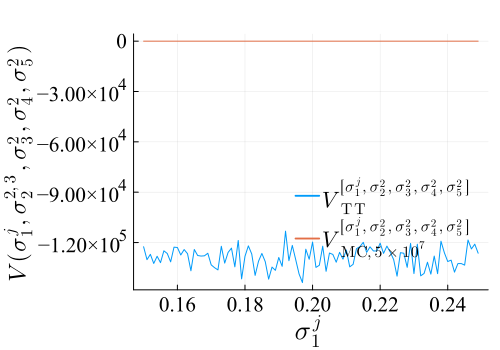

In [20]:
p_nume = plot(
        #yaxis=:log,
        title = " ",
        titlefont = "Times New Roman", 
        xlabel=L"σ^{j}_1", 
        ylabel= L"V(σ^{j}_1, σ^{2,3}_2, σ^{2}_3, σ^{2}_4, σ^{2}_5 ) ",
        legend = :bottomright,
        guidefont = font(10,"Computer Modern"),
        #ylims = (10^1, 3*10^6),
        #ylims = (0, 1.11*10^6),
        #xticks = (vcat(1, [2*i+1 for i in 1:8], 2*d-1)),
        #yticks = ([10^i for i in 1:1:9]),
        titlefontsize = 16,
        legendfontsize = 15,
        tickfontsize = 13,
        xlabelfontsize = 18,
        ylabelfontsize = 16,
        xguidefont = 15,
        yguidefont = 15,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
        fontfamily = "Times New Roman",
        #left_margin=Plots.Measures.Length(:mm, 15.0),
        #left_margin=Plots.Measures.Length(:mm, 10),
        #top_margin=Plots.Measures.Length(:mm, 3.0),
        #bottom_margin=Plots.Measures.Length(:mm, 4.0),
        #right_margin=Plots.Measures.Length(:mm, 3.0),
        size = (500, 350)
        )

plot!(
    p_nume,
    σs,
    real(res),
    #markershape = :circle,
    label = L"V_{\mathrm{TT}}^{[σ^{j}_1, σ^{2}_2, σ^{2}_3, σ^{2}_4, σ^{2}_5]}",
    #markersize = 3.5,
)

plot!(
    p_nume,
    σs,
    monte,
    #markershape = :circle,
    label = L"V_{\mathrm{MC}, 5 \times 10^7}^{[σ^{j}_1, σ^{2}_2, σ^{2}_3, σ^{2}_4, σ^{2}_5]}",
    #markersize = 3.5,
)

#=
plot!(
    p_nume,
    σs,
    real(results_2),
    #markershape = :circle,
    label = L"V_{\mathrm{TT}, 5 \times 10^7}^{[σ^{j}_1, σ^{3}_2, σ^{2}_3, σ^{2}_4, σ^{2}_5]}",
    #markersize = 3.5,
)

plot!(
    p_nume,
    σs,
    monte_2,
    #markershape = :circle,
    label = L"V_{\mathrm{MC}, 5 \times 10^7}^{[σ^{j}_1, σ^{3}_2, σ^{2}_3, σ^{2}_4, σ^{2}_5]}",
    #markersize = 3.5,
)
=#


p_nume

## 微分

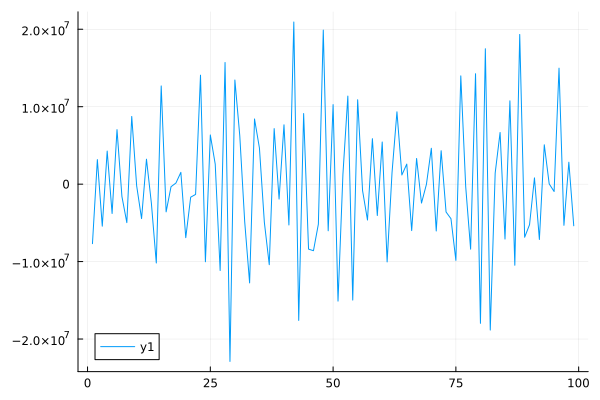

In [21]:
plot(diff(res) ./ diff(σs))

In [22]:
N = 100
δx = 0.001
diff_mat = diff_matrix(N, δx);

UndefVarError: UndefVarError: `diff_matrix` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [23]:
arr1 = reshape(permutedims(option_tt[1], (2, 1, 3)), 100, 2)
#diff_mat * arr1
new_arr1 = reshape(diff_mat * arr1, 1, 100, 2)
new_tt = [new_arr1, option_tt[2], option_tt[3], option_tt[4], option_tt[5]]

UndefVarError: UndefVarError: `diff_mat` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [24]:
#random_combinations = generate_random_combinations(len_σs, d, num_samples)
combinations = [[i, 2, 2, 2, 2] for i in 1:len_σs]
res_ = evaluate_options(combinations, new_tt, η, d, r, T, t);

UndefVarError: UndefVarError: `new_tt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [25]:
plot(res_ )
plot!(diff(res) ./ diff(σs))

UndefVarError: UndefVarError: `res_` not defined in `Main`
Suggestion: check for spelling errors or missing imports.